In [2]:
import pandas as pd
import numpy as np
churn_data = pd.read_csv('C:/Users/Vladimir/DS/Module2/data/churn.csv')
display(churn_data.head())
churn_data.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

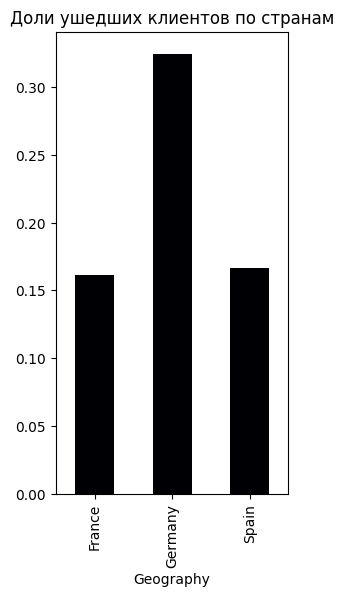

In [3]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму,
# которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано

country_score = churn_data.groupby(['Geography'])['Exited'].mean()
display(country_score)
country_score.plot(
    kind='bar',
    grid=False,
    figsize=(3, 6),
    title='Доли ушедших клиентов по странам',
    colormap='magma'
);



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CumulatedExit
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,809
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,809
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,810
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,814


CumulatedExit,0,1,2,3,4,5,6,7,8,9,...,805,806,807,808,809,810,811,812,813,814
Geography,,,,,,,,,,,,,,,,,,,,,
France,NaN,0.000000,42708.833750,67132.020000,119970.835000,66574.4825,18061.524000,33151.722308,152603.450000,53745.885556,...,94133.094000,57160.593571,94055.6475,72532.753889,60162.246000,65071.3950,NaN,NaN,NaN,NaN
Germany,NaN,129088.075000,116775.183333,112045.670000,121483.748000,125561.9700,124234.023333,111595.925714,97141.933333,151563.743333,...,129623.703333,132110.170000,91177.6300,128610.966667,139655.394286,116953.3625,113957.01,152039.7,111585.92,75075.31
Spain,104659.34,18959.296667,0.000000,53962.848571,62608.708333,121681.8200,46516.898333,0.000000,120887.510000,213146.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


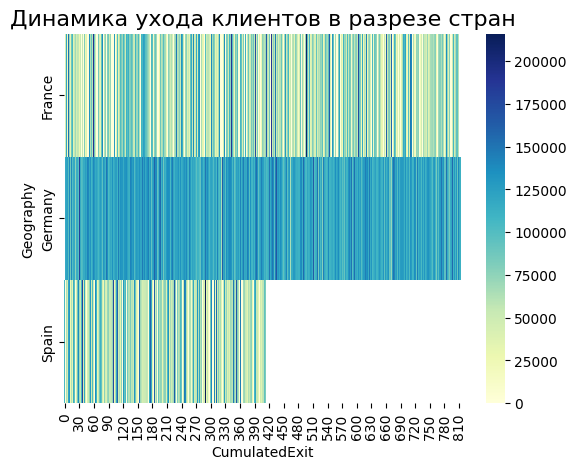

In [5]:
import seaborn as sns
churn_data['CumulatedExit'] = churn_data.groupby('Geography')['Exited'].cumsum()
display(churn_data)
pivot_country_loyalty = churn_data.pivot_table(
    values='Balance',
    columns='CumulatedExit',
    index='Geography',
)
pivot_country_loyalty.columns = pivot_country_loyalty.columns.astype('string')
display(pivot_country_loyalty)
heatmap = sns.heatmap(data=pivot_country_loyalty, cmap='YlGnBu')
heatmap.set_title('Динамика ухода клиентов в разрезе стран', fontsize=16);